<a href="https://colab.research.google.com/github/tlysenko/bionformatics-coursera-sandiego/blob/main/Finding%20Hidden%20Messages%20in%20DNA%20(Bioinformatics%20I)/Bioinformatics_1_week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libraries

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
import itertools

import urllib.request

import time

from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

## 1.3 Give all values of Skew_i (GAGCCACCGCGATA) for i ranging from 0 to 14.



In [ ]:
def CalculateSkew(genome):
  r = len(genome) + 1
  d = {'A':0, 'C':-1, 'G':1, 'T':0}
  skew = [0] * r 
  for i in range(1, r):
    skew[i] = skew[i-1] + d[genome[i-1]]
  skew = np.array(skew)
  return skew
def PlotSkew(skew):
  plt.figure(figsize=(10,5))
  ax = sns.lineplot(x=range(len(skew)),y=skew);
  ax.set(xlabel='position', ylabel='Skew (C-G)', title='Skew diagram')
  plt.show()
  return 

In [ ]:
genome = 'CATGGGCATCGGCCATACGCC'
skew = CalculateSkew(genome)
skew

array([ 0, -1, -1, -1,  0,  1,  2,  1,  1,  1,  0,  1,  2,  1,  0,  0,  0,
        0, -1,  0, -1, -2])

In [ ]:
len(skew), len(genome)

(22, 21)

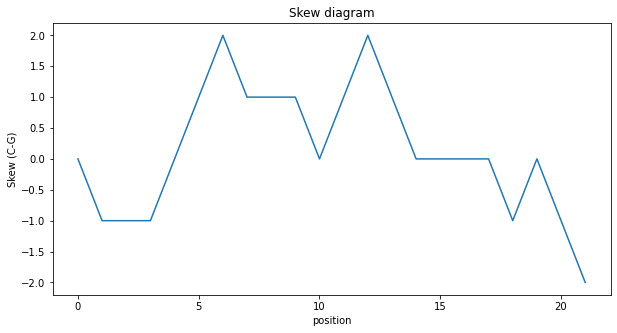

In [ ]:
PlotSkew(skew)

## 1.3 Code Challenge: Solve the Minimum Skew Problem.

Input: A DNA string Genome.

Output: All integer(s) i minimizing Skewi (Genome) among all values of i (from 0 to |Genome|).


#### Example 1

In [ ]:
genome = 'TAAAGACTGCCGAGAGGCCAACACGAGTGCTAGAACGAGGGGCGTAAACGCGGGTCCGAT'
len(genome)

60

In [ ]:
def SkewMin(skew):
  return np.where(skew == skew.min())

In [ ]:
s = CalculateSkew(genome)

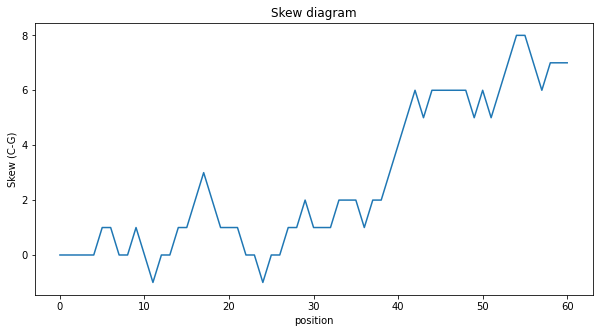

In [ ]:
PlotSkew(s)

In [ ]:
SkewMin(s)

(array([11, 24]),)

#### Example 2

In [ ]:
url = 'http://bioinformaticsalgorithms.com/data/extradatasets/replication/minimum_skew.txt'
response = urllib.request.urlopen(url)
data = response.read().decode('ascii')

In [ ]:
genome=data.split('\r')[1].split('\n')[1]

In [ ]:
answers=data.split('\r')[3].split('\n')[1:]
answers 

['89969 89970 89971 90345 90346']

In [ ]:
s = CalculateSkew(genome)
SkewMin(s)

(array([89969, 89970, 89971, 90345, 90346]),)

### Example 3

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving dataset_7_6-2.txt to dataset_7_6-2.txt
User uploaded file "dataset_7_6-2.txt" with length 92888 bytes


In [ ]:
with open(fn) as f:
  genome = f.readline().split('\n')[0]
len(genome)

92887

In [ ]:
genome[-20:]

'GCACCGAAGAATGGCATATA'

In [ ]:
s = CalculateSkew(genome)
a = SkewMin(s)

In [ ]:
#Stepik submission string
st=''
for i, el in enumerate(a[0]):
  st = st + str(el) + ' '
st

'90506 90507 '

## 1.3 E-coli Skew diagram

In [ ]:
url = 'http://bioinformaticsalgorithms.com/data/realdatasets/Rearrangements/E_coli.txt'
response = urllib.request.urlopen(url)
genome = response.read().decode('ascii')

len(genome)

4639675

In [ ]:
def CalculateSkewStep(genome, step):
  r = len(genome) + 1
  skew = [0]
  for i in range(0,r,step):     
    subs = genome[0:i+step]    
    skew.append(Counter(subs)['G'] - Counter(subs)['C'])
  return skew

In [ ]:
skew = CalculateSkewStep(genome, 100000)
PlotSkew(skew)

NameError: ignored

In [ ]:
skew = CalculateSkew(genome)
SkewMin(skew)

(array([3923620, 3923621, 3923622, 3923623]),)

## 1.4 Hamming Distance Problem: Compute the Hamming distance between two strings.

Input: Two strings of equal length.

Output: The Hamming distance between these strings.

In [ ]:
def HammingtonDistance(genome1, genome2):
  return np.sum([x1!=x2 for x1, x2 in zip(genome1, genome2)])

#### Example 1

In [ ]:
g1 = 'GGGCCGTTGGT'
g2 = 'GGACCGTTGAC'
HammingtonDistance(g1, g2)

3

#### Example 2

In [ ]:
g1='CCGAAGCAATTGAAACCCCCCCGGCCTGGGAGGCGCAAAAATCTGACCTCTTTGTGAGTTGACCACTTAATTTATGTCTGACCACGAGAAGGGCTACTGATTTGGTACGTCGGGTCATGACCCCCAGTTCTTAGCCGCCTGCTCCAATCTCTGACTTGTTTATCGAGGGGATGGAGTAACGAAATGCGATTCGCCCGCTCAGGCCAAGGTATATATTTGAGTAGCGGAAGGTTGCACTACCTACAACCACGGCACACCGGCACGTTGTCGTGCCCTGGCGGCCTGCGCACTTTCGCCACTGTCAAGTACGACTTCCCAAGCTCAACCAACATTCATAATCCGGTGCAATTCATACCGTATCATCGTGCTATAAGCGACGCCGATTCTCGGGGCCTGATAATTGAGACTGGACTACATAGTGGGTGCCCTCTCTGCGAGTAAGTGACGGAACAACGGAGATCAGGGACCAAATGGTAGCAAAACAGATCGAGGTACACGCAGGTAGCTGTCCGTGGAGTAGACCGCGCTTAGCGTCTGTTAGAGTATCATCGGGGTATTAGACACAGGAACCTCTATGCTGTTAAAAGGCCATACCCCGTAATTGTGCAAATTTGTTACGTTCAAATCTACGCAGTGAGGGTCCTAAGGTGATGGCAGGGATTGGAACTTCTCCGCTGGCTCTTAGATTACTTAGCCAGTCTACCCTCGAAGATACAAATCCTTCCACCAGAGGGAGCTCATTGAAATTCATTCCATGCTACTCGACCGCGCGTATGGGTGCGGGGCTCTATGGGATCTAACTCGATCCTTCAGAGTCCTTATTCAAATGCATTTCCGTCCCCGTATGTTTCGACGAAGCCGAAGCCCAAACCCTGGGATGGACGAATTAAGGACAGTACAGGCAATAGTGTTCTCCCATACTCGGAACAGACGCCTCATTTTTTCGCGAAATCGATCTGGGTTGGAAGAAGTTCCAGTGCAGAGTTCCTATCACACAATTCGTTCTCGGGGCTTCCGGCCCATAAGCGATACTACTGTCTTTGCGAGCTAACGATTACATTCGGGGGAACTTAGCTCGGACTGGACCAGGTACATGATCCAAAGCGCGATGTCTGTCTGTTACCCTCACCGCCGCTCTTTTATCGGGTA'
g2 = 'GCGTAGTAGGTTCGCGTACCTAGTTCCGCCGAAAAGACAAAGGAGAAGGGAATGCTCCTAGTAGTTTCAGTCTAGCAAACATGTTATAACGCTAACTGTGTGCTGCAAAAAGGATTTGAACCCAAATTTTAAAGCGCTGATCGACAGAACGCTGTTGAAGAGGCGATGGTACTGAGATTCCCCAGAAACCACCTCCGCGCTATGTGCTCAAGACAACCCGCATTCGTTTTTACTAGATTTGGAGCCGAGTTGTGATTTGGATATTTTCACATAAGACCGAGCAGGAAATATACCTTGTTGCAGCTATTGACCCCGTTCTCTCGGAAATCCATGGAATAGTCTTCGGATATTCGTACCAATGGGCGCGATGTTGCGATAAGAGAGCACATTTCATTAAGTGGTGCTCCGCCGCTAAGATGGGAAGGGGCGAGTCTATCGCAGCATCGAAGGCTGAGTTGGCCATTGCCGAGAGTATACATATTTACGATCACACTCGCATAGTCCCACGCATTACGTCCGAGATAGTATGTCCCAATGCAACCTAAAGCCGCGAGATTCCCTAAGGAGAAAATTAAACACTGGAAATTAGGTGATGCTACATCCCATGGACACTTTCGGAACAATATCGGTGACACACATCATCCGTGATCCCGTGATATTTCATCCATGGAGAGAGTATGGTTTTACTACACCTGGTCTAGGCCAAGCCTAACCCCCTGTTCATCCGTTTTATACGAGTATTACCTTGACGACCATAGAGGATAGACTCGGTATCCCGCACACTCTACACACACGACTTAATCCGCTCCACGACCTTCCTAGCGATCTTTGGCGCAGCCGGTTCGCGTATTTTACGACCAACTCGATGGATCCCAATTATCCCCCTGGTAGTGCCCCTCCGCCTGAGAATTCGACGGGCGAGGTCCGGGGGACCGACATAGAGTGGAATGCTTCTTTCCGGGATAACACGTGATTGACATAAAAATGTAGGGCAGATAGGCATCGTTAGCACCTCTCTCCTTGCTGCACTGCGTTTATCGATCGAATTCAAGACTTGTGCATGTTGAAAACAACCTCGCGTTATCCCTGCTATTTGCTTCAGAGCCGTAGGAGGGGACCATGCGTGAGTCCTCCTGAGCAACCTCAATT'
HammingtonDistance(g1, g2)

844

#### Example 3

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving dataset_9_3.txt to dataset_9_3.txt
User uploaded file "dataset_9_3.txt" with length 2050 bytes


In [ ]:
with open(fn) as f:
  genome1 = f.readline().split('\n')[0]
  genome2 = f.readline().split('\n')[0]

In [ ]:
genome1

'CTCTTCGAAAAGCTCACCGCATAATACACAATAATCTACAGTTCATCGTCTTACCGGAGAATGCTATCGCAAGCAGTTCTGTAATACGCGGTTTGAAGCCGACGGCGCAGTGTGTATGTTAATTGTATGCTCTGAGACTTTTGGACCGAGCGAAAAAGATGCTGCTGTGTGGATGCTTCCACACTTAAATAGTGTGCGACGGTCCAGCGTGAAGGGATGCCCTACGATATGATTAGCTCAAAGTCCTACAAAATAATACTTTTCCTTTCTACTCCCCTGGCGGTCCACTTTTGGCGTCATCGAGAAATCCCGGACAGATCGCCACGCTCGATGGCGTCGTTGTGACGATTATGGTTTACGCTTGCGCGATGCGTCACGCTTGTCAAACTTCTGATCTGAGCAAACAGGACAAAAATGTTGGGATTTGAACGTGCTAGGGACAGTAGTACAAAGTAAGATACGATAGACCTGACGCTTGCGTGTAGATTGGGGGAGGCAAACCACCAAGTGTCGAACCCAGCGGCCGAAATGCATCGCTGGTTGATGTCCAAACGTATCTCACGCAATGGTAGCAACCATGAAACCCTGCCACGAACATAATCCTCGAGATACTTTCCGAGTTGGACTGATTAATAAGGCGGGTAACTGGATAGTAGAGGTCCGCGGACACGACGGGGCCAGGGTGTATCAATTTTTTTGCATTCCACAGTCACCTCAATCGGGCCCGCGCCGGTGAGCGAAGGATTCCTTACATCTCTTTCCAACGGACTCAGGTTATTCGCATCTATGTTGGCGAGTTCACGTGTACATGAAACCTTCTGTTCATAAGCGCGATGTCGCGCATACAGTGAGCACTGATAATAGATTTATAAAGGCAGGGGAGTCAGGGAGGCATATAGACCTAAGTATTGGTTATCGAAGATGATTCGCTAGGCAATTAGGAGTAGGGGAACTCGTAAGTCTTTCGCAAACGACCCGCAGCGCCTCGCTCCGATACTT

In [ ]:
HammingtonDistance(genome1, genome2)

781

## 1.4 Approximate Pattern Matching Problem: Find all approximate occurrences of a pattern in a string.

Input: Strings Pattern and Text along with an integer d.

Output: All starting positions where Pattern appears as a substring of Text with at most d mismatches.

In [ ]:
def ApproxPatternMatch(pattern, genome, d):
  idx = []
  p_len = len(pattern)
  g_len = len(genome) - p_len + 1

  for i in range(0, g_len):
    dist = HammingtonDistance(pattern, genome[i:i+p_len])
    #print(i, dist)
    if dist<=d :
      idx.append(i)
  return idx

#### Example 1

In [ ]:
pattern = 'ATTCTGGA'
genome = 'CGCCCGAATCCAGAACGCATTCCCATATTTCGGGACCACTGGCCTCCACGGTACGGACGTCAATCAAAT'
d = 3
ApproxPatternMatch(pattern, genome, d)

#### Example 2 

In [ ]:
url = 'http://bioinformaticsalgorithms.com/data/extradatasets/replication/approximate_match.txt'
response = urllib.request.urlopen(url)
data = response.read().decode('ascii')

In [ ]:
pattern = data.split('\r')[1].split('\n')[1]
genome = data.split('\r')[2].split('\n')[1]
d = int(data.split('\r')[3].split('\n')[1])
correct_output = data.split('\r')[5].split('\n')[1]

In [ ]:
output = ApproxPatternMatch(pattern, genome, d)

In [ ]:
st = ''
for i in range(len(output)):
  st = st + str(output[i]) + ' '

In [ ]:
sum([x!=y for x,y in zip(st,correct_output)])

0

### Example 3

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving dataset_9_4-3.txt to dataset_9_4-3.txt
User uploaded file "dataset_9_4-3.txt" with length 19308 bytes


In [ ]:
with open(fn) as f:
  pattern = f.readline().split('\n')[0]
  genome = f.readline().split('\n')[0]
  d = int(f.readline().split('\n')[0])

In [ ]:
output = ApproxPatternMatch(pattern, genome, d)

In [ ]:
st = ''
for i in range(len(output)):
  st = st + str(output[i]) + ' '
st

## 1.4 Code Challenge: Implement ApproximatePatternCount.

Input: Strings Pattern and Text as well as an integer d.

Output: Countd(Text, Pattern).

In [ ]:
def ApproximatePatternCount(genome, pattern, d):
  p_len = len(pattern)
  g_len = len(genome) - p_len + 1
  cnt = 0

  for i in range(0, g_len):
    dist = HammingtonDistance(pattern, genome[i:i+p_len])
    
    if dist<=d :
      cnt +=1
  return cnt

In [ ]:
genome = 'AACAAGCTGATAAACATTTAAAGAG'
pattern = 'AAAAA'
d = 2
ApproximatePatternCount(genome, pattern, d)

11

In [ ]:
pattern = 'GAGG'
genome = 'TTTAGAGCCTTCAGAGG'
d = 2
ApproximatePatternCount(genome, pattern, d)

4

#### Stepik submission

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving dataset_9_6.txt to dataset_9_6.txt
User uploaded file "dataset_9_6.txt" with length 370 bytes


In [ ]:
with open(fn) as f:
  pattern = f.readline().split('\n')[0]
  genome = f.readline().split('\n')[0]
  d = int(f.readline().split('\n')[0])

In [ ]:
ApproximatePatternCount(genome, pattern, d)

31

## 1.4 Frequent Words with Mismatches Problem: Find the most frequent k-mers with mismatches in a string.

Input: A string Text as well as integers k and d. (You may assume k ≤ 12 and d ≤ 3.)

Output: All most frequent k-mers with up to d mismatches in Text.

In [ ]:
def CreateKmerList(k):
  kmer_list = list(itertools.product('ACGT', repeat = k))
  l_kmer = len(kmer_list)

  kmer_new = []
  for i in range(l_kmer):
    elem = ''
    for j in range(k):
      elem += kmer_list[i][j]
    kmer_new.append(elem)
  return kmer_new

def HammingtonDistance(genome1, genome2):
  return np.sum([x1!=x2 for x1, x2 in zip(genome1, genome2)])

def ApproximatePatternCount(genome, pattern, d):
  p_len = len(pattern)
  g_len = len(genome) - p_len + 1
  cnt = 0

  for i in range(0, g_len):
    dist = HammingtonDistance(pattern, genome[i:i+p_len])
    
    if dist<=d :
      cnt +=1
  return cnt

def GetFreqKmers(genome, d, k):
  kmer_list = CreateKmerList(k)
  freq_kmers = {}

  for kmer in kmer_list: 
    freq = ApproximatePatternCount(genome, kmer, d)
    if freq > 0:
      freq_kmers[kmer] = freq
  return [k for k,v in freq_kmers.items() if v == max(freq_kmers.values())]

In [ ]:
genome = 'ACGTTGCATGTCGCATGATGCATGAGAGCT'
k = 4
d = 1
GetFreqKmers(genome, d, k)

['ATGC', 'ATGT', 'GATG']

#### Stepik submission

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving dataset_9_7.txt to dataset_9_7.txt
User uploaded file "dataset_9_7.txt" with length 388 bytes


In [ ]:
with open(fn) as f:
  genome = f.readline().split('\n')[0]
  kd = f.readline().split('\n')[0].split(' ')
  k = int(kd[0])
  d = int(kd[1])

In [ ]:
ll = GetFreqKmers(genome, d, k)

st = ''
for el in ll:
  st = st + str(el)+' '
st.strip()

'TTGTGTG'

## 1.4 Frequent Words with Mismatches and Reverse Complements Problem: Find the most frequent k-mers (with mismatches and reverse complements) in a string.

Input: A DNA string Text as well as integers k and d.

Output: All k-mers Pattern maximizing the sum Countd(Text, Pattern)+ Countd(Text, Patternrc) over all possible k-mers.

In [ ]:
def HammingtonDistance(genome1, genome2):
  return np.sum([x1!=x2 for x1, x2 in zip(genome1, genome2)])

def ApproximatePatternCount(genome, pattern, d):
  p_len = len(pattern)
  g_len = len(genome) - p_len + 1
  cnt = 0

  for i in range(0, g_len):
    dist = HammingtonDistance(pattern, genome[i:i+p_len])
    
    if dist<=d :
      cnt +=1
  return cnt
def ReverseComplement(pattern): 
  d = {'G':'C', 'C':'G', 'T':'A', 'A':'T'}
  lst = [d[el] for el in pattern[::-1]]
  st=''
  return st.join(lst)

In [ ]:
def PatternToNumer(pattern):
  d = {'A':0,'C':1,'G':2,'T':3}
  if len(pattern) == 0:
    num = 0
  else:
    symb = pattern[-1]
    pref = pattern[:-1]
    num = 4 * PatternToNumer(pref) + d[symb]
  return num
def NumberToSymbol(num):
  d = {0:'A', 1:'C', 2: 'G', 3: 'T'}
  return d[num]
def NumberToPattern(index, k):
  if k == 1:
    pattern = NumberToSymbol(index)
  else:
    prefixIndex = index // 4
    r = index % 4
    symb = NumberToSymbol(r)
    prefixPattern = NumberToPattern(prefixIndex, k-1)
    pattern = prefixPattern + symb
  return pattern

In [ ]:
def GetFreqWordsMismReverse(genome, d, k):
  l = 4**k
  kmers_lst = []
  kmers_idx = range(l)
  kmers_freq = np.zeros(l)
  kmers_flag = [False] * l 
  for i in range(l):
    kmers_lst.append(NumberToPattern(i,k))
  for i in range(l):
    if kmers_flag[i] == False:
      kmer = kmers_lst[i]
      f1 = ApproximatePatternCount(genome, kmer, d)
      reversed_kmer = ReverseComplement(kmer)
      f2 = ApproximatePatternCount(genome, reversed_kmer, d)
      kmers_freq[i] = f1+f2

      i2 = PatternToNumer(reversed_kmer)
      kmers_freq[i2] = f1+f2

      kmers_flag[i] = True
      kmers_flag[i2] = True

  max_value = max(kmers_freq)
  answer = [NumberToPattern(i,k) for i in np.where(kmers_freq==max_value)[0]]
  return answer

#### Example 1 

In [ ]:
dgenome = 'ACGTTGCATGTCGCATGATGCATGAGAGCT'
k = 4 
d = 1 
GetFreqWordsMismReverse(genome, d, k)

['ACAT', 'ATGT']

### Example 2

In [ ]:
url = 'http://bioinformaticsalgorithms.com/data/extradatasets/replication/frequent_words_mismatch_complements.txt'
response = urllib.request.urlopen(url)
data = response.read().decode('ascii')

genome = data.split('\r')[1].split('\n')[1]
correct_answer = data.split('\r')[4].split('\n')[1]
k = 9
d = 3

output = GetFreqWordsMismReverse(genome, d, k)
output

['AGCGCCGCT', 'AGCGGCGCT']

### Stepik submission

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving dataset_9_8-2.txt to dataset_9_8-2.txt
User uploaded file "dataset_9_8-2.txt" with length 226 bytes


In [ ]:
with open(fn) as f:
  genome = f.readline().split('\n')[0]
  lst = list(f.readline().split('\n')[0])
  k = int(lst[0])
  d = int(lst[2])

In [ ]:
GetFreqWordsMismReverse(genome, d, k)

['AAATT', 'AATTT', 'ATATA', 'TATAT']

### Quizz

In [ ]:
g1 = 'CTTGAAGTGGACCTCTAGTTCCTCTACAAAGAACAGGTTGACCTGTCGCGAAG'
g2 = 'ATGCCTTACCTAGATGCAATGACGGACGTATTCCTTTTGCCTCAACGGCTCCT'
def HammingtonDistance(genome1, genome2):
  return np.sum([x1!=x2 for x1, x2 in zip(genome1, genome2)])
HammingtonDistance(g1 ,g2)

43

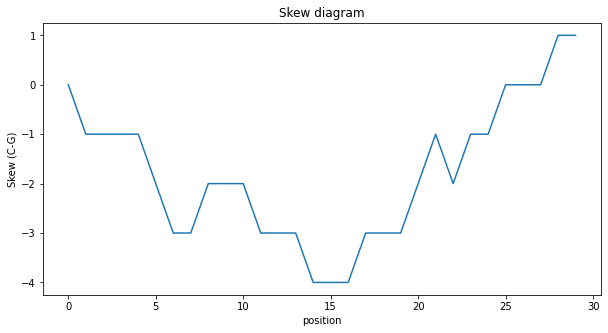

(array([28, 29]),)

In [ ]:
genome = 'CATTCCAGTACTTCATGATGGCGTGAAGA'
def CalculateSkew(genome):
  r = len(genome) + 1
  d = {'A':0, 'C':-1, 'G':1, 'T':0}
  skew = [0] * r 
  for i in range(1, r):
    skew[i] = skew[i-1] + d[genome[i-1]]
  skew = np.array(skew)
  return skew

skew = CalculateSkew(genome)
def SkewMax(skew):
  return np.where(skew == skew.max())

PlotSkew(skew)
SkewMax(skew)

In [ ]:
for i,sk in enumerate(skew):
  print(i+1,sk)

1 0
2 -1
3 -1
4 -1
5 -1
6 -2
7 -3
8 -3
9 -2
10 -2
11 -2
12 -3
13 -3
14 -3
15 -4
16 -4
17 -4
18 -3
19 -3
20 -3
21 -2
22 -1
23 -2
24 -1
25 -1
26 0
27 0
28 0
29 1
30 1


In [ ]:
SkewMax(skew)

(array([28, 29]),)

In [ ]:
1 + 15 + 9*20

196

In [ ]:
chars = "ACGT"

def neighbors(pattern, d):
    assert(d <= len(pattern))

    if d == 0:
        return [pattern]

    r2 = neighbors(pattern[1:], d-1)
    r = [c + r3 for r3 in r2 for c in chars if c != pattern[0]]

    if (d < len(pattern)):
        r2 = neighbors(pattern[1:], d)
        r += [pattern[0] + r3 for r3 in r2]

    return r

def neighbors2(pattern, d):
    return sum([neighbors(pattern, d2) for d2 in range(d + 1)], [])

In [ ]:
len(neighbors2('TGCAT', 2))

106

In [ ]:
[i + j for i in [1,2,3] for j in [10,20,30]]

[11, 21, 31, 12, 22, 32, 13, 23, 33]

## 1.6 Final Challenge: Find a DnaA box in Salmonella enterica.

1. Plot the skew diagram to see if there is a visible max and min points poiting to the oriC and ter
2. Zoom into the minimum and look for frequent kmer
? identify clump zone
? identify k ? 

In [ ]:
url = 'http://bioinformaticsalgorithms.com/data/Salmonella_enterica.txt'
response = urllib.request.urlopen(url)
data = response.read().decode('ascii')

In [ ]:
sb1 = data.split('\r')[1:]
sb1
genome = ''
for line in sb1: 
  genome = genome + line.split('\n')[1]
genome = genome.strip()

In [ ]:
len(genome)

4809037

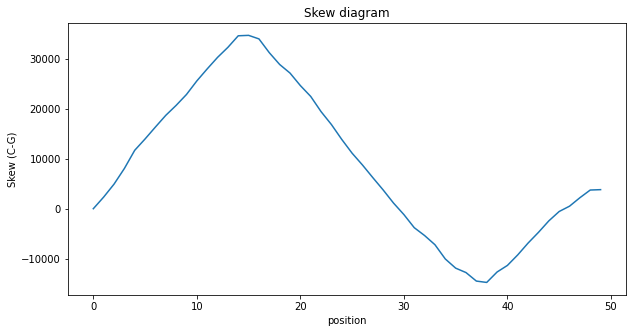

In [ ]:
skew_step_salm  = CalculateSkewStep(genome, step=100000)
PlotSkew(skew_step_salm)

In [ ]:
skew_salm = CalculateSkew(genome)

In [ ]:
def SkewMin(skew):
  return np.where(skew == skew.min())
def SkewMax(skew):
  return np.where(skew == skew.max())

SkewMin(skew_salm), SkewMax(skew_salm)

((array([3764856, 3764858]),),
 (array([1465298, 1465300, 1465303, 1465310, 1465311, 1465312, 1465313,
         1465314, 1465315, 1465318, 1465319, 1465321]),))

In [ ]:
min_id = 3764856
delta = 250
genome[min_id-delta : min_id + delta]

'GCGATCAATGGCAGACATTACTCTTATCAGCGGCAGCACCCTGGGCGGCGCCGAATACGTCGCGGAACATCTGGCGGAAAAGCTGGAAGCTGCCGGTTTTTCAACCGAAACGGTGCACGGTCCGTTATTAGAGGATCTGTCAACTTCCGGGATCTGGCTGATAATCAGCTCAACGCACGGCGCCGGAGACATTCCGGACAACCTGACCCCTTTCTATGAAGACCTTCAGACGCAGAAACCCGATCTTTCCGCGGTACGTTTCGGCGCAATTGGCATTGGCAGTCGAGAATACGACACGTTTTGCGGCGCGATTGAGAAAATAGAAGCGGAACTGAAAGGCGCTGGCGCAAAACAGGTTGGGGAAACACTGAAGATCAACATCCTTGAACATGAGATTCCGGAAGATCCAGCGGAGATTTGGCTCGGATCCTGGATTAATTTACTCAAATAAGTGTAAAGATCGTGCGATCTATTGTGGATAAATATGGTGAAAAGCTTGG'

In [ ]:
delta = 250

GetFreqWordsMismReverse(genome[min_id-delta : min_id + delta], d=3, k=9)

['ATTTTCCGC', 'GCGGAAAAT']

## 1.8 CS: Generating the Neighborhood of a String

In [ ]:
ImmediateNeighbors(Pattern)
    Neighborhood ← the set consisting of single string Pattern
    for i = 1 to |Pattern|
        symbol ← i-th nucleotide of Pattern
        for each nucleotide x different from symbol
            Neighbor ← Pattern with the i-th nucleotide substituted by x
            add Neighbor to Neighborhood
    return Neighborhood

In [ ]:
def ImmediateNeighbors(pattern):
    neighborhood = set()
    for i in range(len(pattern)):
        symbol = pattern[i]
        for x in "ACTG":
            if x != symbol:
                neighbor = pattern[:i] + x + pattern[i+1:]
                neighborhood.add(neighbor)
    return neighborhood, len(neighborhood)
ImmediateNeighbors('ACT')

({'AAT', 'ACA', 'ACC', 'ACG', 'AGT', 'ATT', 'CCT', 'GCT', 'TCT'}, 9)

In [ ]:
 Neighbors(Pattern, d)
        if d = 0
            return {Pattern}
        if |Pattern| = 1 
            return {A, C, G, T}
        Neighborhood ← an empty set
        SuffixNeighbors ← Neighbors(Suffix(Pattern), d)
        for each string Text from SuffixNeighbors
            if HammingDistance(Suffix(Pattern), Text) < d
                for each nucleotide x
                    add x • Text to Neighborhood
            else
                add FirstSymbol(Pattern) • Text to Neighborhood
        return Neighborhood

In [ ]:
def HammingtonDistance(genome1, genome2):
  return np.sum([x1!=x2 for x1, x2 in zip(genome1, genome2)])

def Neighbors(pattern,d):
  if d == 0:
    return {pattern}
  if len(pattern) == 1:
    return {'A','C','G','T'}

  neighborhood = set()

  suffixNeighbors = Neighbors(pattern[1:], d)

  for el in suffixNeighbors:
    if HammingtonDistance(pattern[1:], el) < d:
      for x in 'ACGT':
        neighborhood.add(x+el)
    else:
      neighborhood.add(pattern[0]+el)
  return neighborhood

Neighbors('ACT',1)

{'AAT', 'ACA', 'ACC', 'ACG', 'ACT', 'AGT', 'ATT', 'CCT', 'GCT', 'TCT'}

## 1.7 CS: Solving the Frequent Words with Mismatches Problem

In [ ]:
ComputingFrequenciesWithMismatches(Text, k, d)
    for i ← 0 to 4k − 1
        FrequencyArray(i) ← 0
    for i ← 0 to |Text|−k
        Pattern ← Text(i, k)
        Neighborhood ← Neighbors(Pattern, d)
        for each string ApproximatePattern in Neighborhood
            j ← PatternToNumber(ApproximatePattern)
            FrequencyArray(j) ← FrequencyArray(j) + 1
    return FrequencyArray 

In [ ]:
def HammingtonDistance(genome1, genome2):
  return np.sum([x1!=x2 for x1, x2 in zip(genome1, genome2)])

def ApproximatePatternCount(genome, pattern, d):
  p_len = len(pattern)
  g_len = len(genome) - p_len + 1
  cnt = 0

  for i in range(0, g_len):
    dist = HammingtonDistance(pattern, genome[i:i+p_len])
    
    if dist<=d :
      cnt +=1
  return cnt
def ReverseComplement(pattern): 
  d = {'G':'C', 'C':'G', 'T':'A', 'A':'T'}
  lst = [d[el] for el in pattern[::-1]]
  st=''
  return st.join(lst)
def PatternToNumber(pattern):
  d = {'A':0,'C':1,'G':2,'T':3}
  if len(pattern) == 0:
    num = 0
  else:
    symb = pattern[-1]
    pref = pattern[:-1]
    num = 4 * PatternToNumer(pref) + d[symb]
  return num
def NumberToSymbol(num):
  d = {0:'A', 1:'C', 2: 'G', 3: 'T'}
  return d[num]
def NumberToPattern(index, k):
  if k == 1:
    pattern = NumberToSymbol(index)
  else:
    prefixIndex = index // 4
    r = index % 4
    symb = NumberToSymbol(r)
    prefixPattern = NumberToPattern(prefixIndex, k-1)
    pattern = prefixPattern + symb
  return pattern

In [36]:
def ComputingFrequenciesWithMismatches(text, k, d):
  freqArray = [0] * 4**k
  l = len(text)-k+1
  for i in range(l):
    pattern = text[i : i+k]
    neighborhood = Neighbors(pattern, d)
    for approxPattern in neighborhood: 
      j = PatternToNumber(approxPattern)
      freqArray[j] = freqArray[j]+1 
  return freqArray
text = 'AAAAC'
k=2
d=0
ComputingFrequenciesWithMismatches(text, k, d)

[3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [43]:
def MostFreqWordsWithMismatches(text, k, d):
  freqArray = [0] * 4**k
  l = len(text)-k+1
  for i in range(l):
    pattern = text[i : i+k]
    neighborhood = Neighbors(pattern, d)
    for approxPattern in neighborhood: 
      j = PatternToNumber(approxPattern)
      freqArray[j] = freqArray[j]+1
  maxVal = max(freqArray) 
  kmers = [NumberToPattern(c,k) for c,v in enumerate(freqArray) if v == maxVal]
  return kmers
text = 'ACGTTGCATGTCGCATGATGCATGAGAGCT'
k=4
d=1
MostFreqWordsWithMismatches(text, k, d)

['ATGC', 'ATGT', 'GATG']